In [ ]:
pip install pandas scikit-learn matplotlib wordcloud


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from wordcloud import WordCloud
from collections import Counter
import re
import string

# Load data
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [ ]:
def simple_tokenizer(text):
    # Lowercase
    text = text.lower()
    # Remove URLs and email addresses
    text = re.sub(r'http\S+|www\S+|[\w.-]+@[\w.-]+', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    return [word for word in text.split() if word not in stopwords]

stopwords = set("""
a about above after again against all am an and any are as at be because been before being below between both
but by could did do does doing down during each few for from further had has have having he he'd he'll he's her
here here's hers herself him himself his how how's i i'd i'll i'm i've if in into is it it's its itself let's me
more most my myself nor of on once only or other ought our ours ourselves out over own same she she'd she'll she's
should so some such than that that's the their theirs them themselves then there there's these they they'd they'll
they're they've this those through to too under until up very was we we'd we'll we're we've were what what's when
when's where where's which while who who's whom why why's with would you you'd you'll you're you've your yours yourself yourselves
""".split())


In [ ]:
def get_ngrams(texts, n=1, top_n=10):
    ngram_counts = Counter()
    for text in texts:
        tokens = simple_tokenizer(text)
        ngrams = zip(*[tokens[i:] for i in range(n)])
        ngram_counts.update([' '.join(ngram) for ngram in ngrams])
    return ngram_counts.most_common(top_n)

for label_name, label_num in [('ham', 0), ('spam', 1)]:
    print(f"\nTop 10 words for {label_name}")
    print(get_ngrams(df[df['label'] == label_num]['text'], 1))

    print(f"\nTop 10 bigrams for {label_name}")
    print(get_ngrams(df[df['label'] == label_num]['text'], 2))

    print(f"\nTop 10 trigrams for {label_name}")
    print(get_ngrams(df[df['label'] == label_num]['text'], 3))



Top 10 words for ham
[('u', 988), ('im', 451), ('not', 406), ('can', 376), ('will', 334), ('get', 307), ('just', 289), ('now', 289), ('ltgt', 276), ('no', 273)]

Top 10 bigrams for ham
[('call later', 50), ('ill call', 47), ('let know', 39), ('im not', 39), ('sorry ill', 39), ('r u', 37), ('u r', 37), ('right now', 35), ('dont know', 32), ('good morning', 30)]

Top 10 trigrams for ham
[('ill call later', 42), ('sorry ill call', 38), ('happy new year', 18), ('pls send message', 13), ('cant pick phone', 12), ('pick phone right', 12), ('phone right now', 12), ('right now pls', 12), ('now pls send', 12), ('hi hi hi', 11)]

Top 10 words for spam
[('call', 349), ('å£', 270), ('free', 219), ('now', 190), ('u', 155), ('txt', 150), ('ur', 144), ('mobile', 124), ('text', 121), ('stop', 116)]

Top 10 bigrams for spam
[('call now', 61), ('å£ prize', 50), ('please call', 46), ('å£ cash', 45), ('won å£', 32), ('po box', 28), ('p per', 25), ('contact u', 24), ('guaranteed call', 23), ('call landline

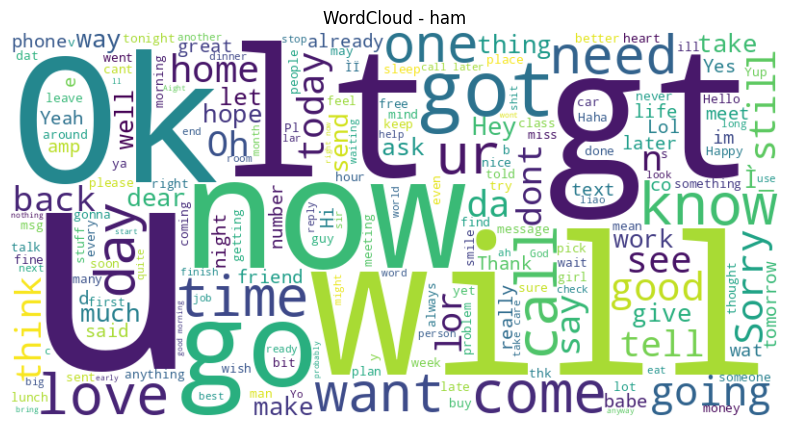

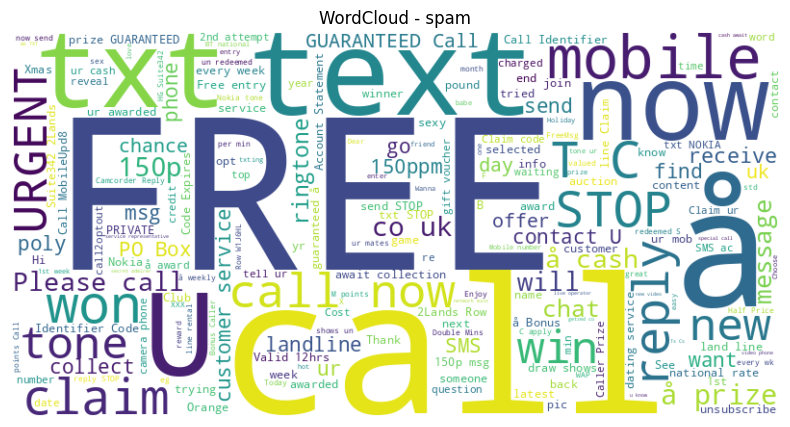

In [ ]:
for label_name, label_num in [('ham', 0), ('spam', 1)]:
    text = ' '.join(df[df['label'] == label_num]['text'].tolist())
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud - {label_name}')
    plt.show()


In [ ]:
# Model 2: TF-IDF + Logistic Regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(df['text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train, y_train)
pred_tfidf = model_tfidf.predict(X_test)
f1_tfidf = f1_score(y_test, pred_tfidf)
print("F1 Score (TF-IDF):", f1_tfidf)


F1 Score (TF-IDF): 0.8416988416988417


In [ ]:
def clean_text(text):
    return ' '.join(simple_tokenizer(text))

df['clean_text'] = df['text'].apply(clean_text)

vectorizer_clean = TfidfVectorizer()
X_clean = vectorizer_clean.fit_transform(df['clean_text'])

X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)
model_clean = LogisticRegression(max_iter=1000)
model_clean.fit(X_train, y_train)
pred_clean = model_clean.predict(X_test)
f1_clean = f1_score(y_test, pred_clean)


In [ ]:
summary = pd.DataFrame({
    'Model': ['BoW', 'TF-IDF', 'TF-IDF + Cleaned'],
    'F1 Score': [f1_bow, f1_tfidf, f1_clean]
})
print(summary)


              Model  F1 Score
0               BoW  0.909747
1            TF-IDF  0.841699
2  TF-IDF + Cleaned  0.772908
